In [1]:
import pandas as pd
details = pd.read_csv("email_thread_details.csv")
summaries = pd.read_csv("email_thread_summaries.csv")

In [2]:
details

,thread_id,subject,timestamp,from,to,body
0,1,FW: Master Termination Log,2002-01-29 11:23:42,"Gossett, Jeffrey C. JGOSSET","['Giron', 'Darron C. Dgiron', 'Love', 'Phillip...",\n\n -----Original Message-----\nFrom: =09Ther...
1,1,FW: Master Termination Log,2002-01-31 12:50:00,"Theriot, Kim S. KTHERIO","['Murphy', 'Melissa Mmurphy', 'Gossett', 'Jeff...",\n\n -----Original Message-----\nFrom: =09Panu...
2,1,FW: Master Termination Log,2002-02-05 15:03:35,"Theriot, Kim S. KTHERIO","['Murphy', 'Melissa Mmurphy', 'Anderson', 'Dia...",Note to Stephanie Panus....\n\nStephanie...ple...
3,1,FW: Master Termination Log,2002-02-05 15:06:25,"Theriot, Kim S. KTHERIO","['Hall', 'D. Todd Thall', 'Sweeney', 'Kevin Ks...",\n\n -----Original Message-----\nFrom: =09Panu...
4,1,FW: Master Termination Log,2002-05-28 07:20:35,"Kelly, Katherine L. KKELLY","['Germany', 'Chris Cgerman']",\n\n -----Original Message-----\nFrom: =09McMi...
...,...,...,...,...,...,...
21679,4166,vacation,2000-10-04 11:32:00,Sara Shackleton,"['Gary Hickerson', 'Sheila Glover', 'Laurel Ad...",I will be on vacation from October 6- 13. Als...
21680,4167,web file,2001-03-18 22:57:00,Matt Smith,['Amanda Huble'],"Amanda,\n\nCan you put this file in the approp..."
21681,4167,web file,2001-03-19 04:42:00,Matt Smith,['Amanda Huble'],"Amanda,\n\nPlease move the file i sent you fro..."
21682,4167,web file,2001-03-19 09:57:00,Matt Smith,['Amanda Huble <Amanda Huble/NA/Enron@Enron'],"Amanda,\n\nCan you put this file in the approp..."


In [3]:
summaries

,thread_id,summary
0,1,The email thread discusses the Master Terminat...
1,2,A lunch meeting has been scheduled for May 5th...
2,3,Ben is updating a friend on his progress with ...
3,4,The recipient of the email thread initially ex...
4,5,The email thread discusses the long form confi...
...,...,...
4162,4163,Peter Thompson has sent a memo to Kay Mann and...
4163,4164,The email thread revolves around the sharing a...
4164,4165,Susan asks Emily about her plans for the weeke...
4165,4166,Several employees will be on vacation during d...


In [5]:
details.isnull().sum()

,0
thread_id,0
subject,0
timestamp,0
from,0
to,0
body,0


In [6]:
summaries.isnull().sum()

,0
thread_id,0
summary,0


In [9]:
emails_per_thread = details.groupby("thread_id").size()

emails_per_thread.describe()

,0
count,4167.000000
mean,5.203744
std,1.559049
min,4.000000
25%,4.000000
50%,5.000000
75%,6.000000
max,10.000000


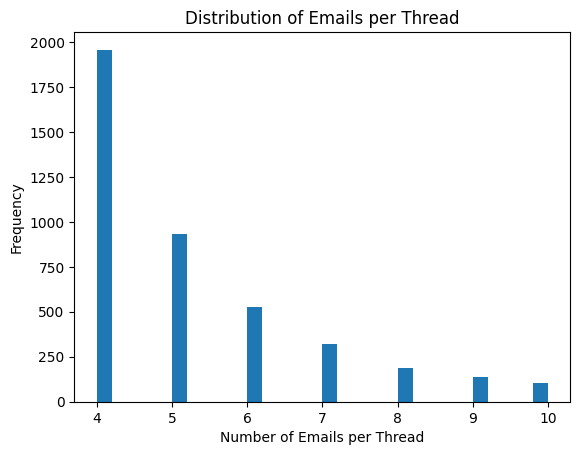

In [10]:
import matplotlib.pyplot as plt

plt.hist(emails_per_thread, bins=30)
plt.xlabel("Number of Emails per Thread")
plt.ylabel("Frequency")
plt.title("Distribution of Emails per Thread")
plt.show()

In [11]:
details["body_length"] = details["body"].astype(str).apply(lambda x: len(x.split()))

details["body_length"].describe()

,body_length
count,21684.000000
mean,247.143101
std,515.455457
min,1.000000
25%,54.000000
50%,147.000000
75%,306.000000
max,28168.000000


In [12]:
summaries["summary_length"] = summaries["summary"].astype(str).apply(lambda x: len(x.split()))

summaries["summary_length"].describe()

,summary_length
count,4167.000000
mean,82.971922
std,20.884221
min,11.000000
25%,70.000000
50%,83.000000
75%,94.000000
max,182.000000


In [16]:
details["body_length"] = details["body"].astype(str).apply(lambda x: len(x.split()))
thread_lengths = details.groupby("thread_id")["body_length"].sum()
compression_df = summaries.merge(
    thread_lengths.rename("thread_length"),
    on="thread_id"
)

compression_df["compression_ratio"] = (
    compression_df["summary_length"] / compression_df["thread_length"]
)

compression_df["compression_ratio"].describe()

,compression_ratio
count,4167.000000
mean,0.168695
std,0.234775
min,0.001848
25%,0.055972
50%,0.100089
75%,0.191970
max,5.923077


In [17]:
import ast
details["to_parsed"] = details["to"].apply(ast.literal_eval)
details["num_recipients"] = details["to_parsed"].apply(len)

details["num_recipients"].describe()

,num_recipients
count,21684.000000
mean,5.612433
std,26.186068
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,831.000000


In [14]:
details["has_quote"] = details["body"].astype(str).str.contains(
    "-----Original Message-----|On .* wrote:", regex=True
)

details["has_quote"].mean()

np.float64(0.33536247924737134)